In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import collections
import datetime
import json
from dateutil import parser
import csv
import seaborn as sns


tqdm.pandas()

In [2]:
def fix_date(date):
    json_acceptable_string = date.replace("'", "\"")
    d = json.loads(json_acceptable_string)
    return(parser.parse(d['$date']))

In [3]:
def bucket(core_periphery):
    if core_periphery > 2 and core_periphery <= 4:
        return 3
    elif core_periphery > 4 and core_periphery <= 7:
        return 4
    elif core_periphery > 7:
        return 5
    else:
        return core_periphery

# Volume of edges over time

## DT

In [233]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')
df['timestamp'] = df['timestamp'].apply(lambda x: x['$date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.date

In [234]:
temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]

In [235]:
count_df = temp_df.groupby('timestamp').count()['_id']

In [239]:
count_df = count_df.to_frame(name='count')

In [241]:
count_df.to_csv('Data/Processed Data/Count per day/DT.csv')

In [62]:
count_dict = count_df.to_dict()

In [63]:
date = []
count = []
for key in sorted(count_dict):
    date.append(key)
    count.append(count_dict[key])


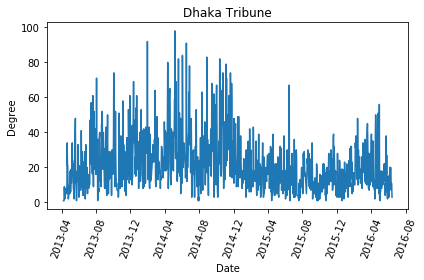

In [65]:
plt.xticks(rotation=70)
plt.title('Dhaka Tribune')
plt.xlabel("Date")
plt.ylabel("Degree")
plt.plot(date, count)

plt.tight_layout()
plt.savefig('Figures/DT-Degree.jpg')
# plt.show()

## DS

In [242]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')

In [243]:
df['timestamp'] = df['timestamp'].progress_apply(fix_date)

100%|██████████| 914208/914208 [01:37<00:00, 9397.67it/s]


In [68]:
# temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
# count_df = temp_df.groupby('timestamp').count()['_id']
# count_dict = count_df.to_dict()

# date = []
# count = []
# for key in sorted(count_dict):
#     date.append(key)
#     count.append(count_dict[key])

In [244]:
temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
count_df = temp_df.groupby('timestamp').count()['_id']
count_df = count_df.to_frame(name='count')
count_df.to_csv('Data/Processed Data/Count per day/DS.csv')

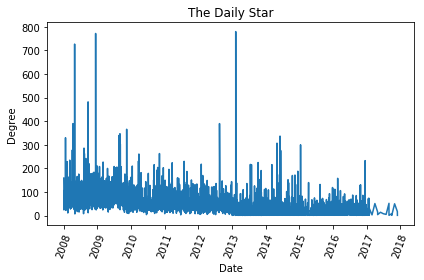

In [70]:
plt.xticks(rotation=70)
plt.title('The Daily Star')
plt.xlabel("Date")
plt.ylabel("Degree")
plt.plot(date, count)

plt.tight_layout()
plt.savefig('Figures/DS-Degree.pdf')
# plt.show()

## NA

In [245]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')

In [246]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [73]:
# temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
# count_df = temp_df.groupby('timestamp').count()['_id']
# count_dict = count_df.to_dict()

# date = []
# count = []
# for key in sorted(count_dict):
#     date.append(key)
#     count.append(count_dict[key])


In [247]:
temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
count_df = temp_df.groupby('timestamp').count()['_id']
count_df = count_df.to_frame(name='count')
count_df.to_csv('Data/Processed Data/Count per day/NA.csv')

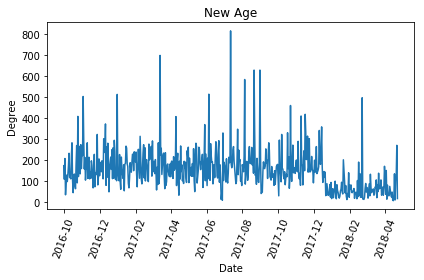

In [75]:
plt.xticks(rotation=70)
plt.title("New Age")
plt.xlabel("Date")
plt.ylabel("Degree")
plt.plot(date, count)

plt.tight_layout()
plt.savefig('Figures/NA-Degree.pdf')
# plt.show()

# Smoothening the curve with expiry dates

In [80]:
expiry_date = 10

## DT

In [88]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')
df['timestamp'] = df['timestamp'].apply(lambda x: x['$date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.date
df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]

In [89]:
df.sort_values(by='timestamp', inplace=True)

In [97]:
subject_objects = []
subject_objects_with_timestamps = []
days = []
edgeOccurencesEachDay = {}

for _, row in df.iterrows():
    date = row['timestamp']
    subject_objects.append(tuple((row['entity0'],row['entity1'])))
    
    for i in range(1,expiry_date+1):
        subject_objects_with_timestamps.append(tuple((row['entity0'],row['entity1'],date)))
        
        if date in edgeOccurencesEachDay:
            edgeOccurencesEachDay[date] += 1
        else:
            edgeOccurencesEachDay[date] = 1
            days.append(date)
            previousDay = date
        date = date + datetime.timedelta(days=1)
        

edgeOccurencesEachDay = (collections.OrderedDict(sorted(edgeOccurencesEachDay.items())))
counter = collections.Counter(subject_objects)
numberOfTupleOccurences = sorted(counter.items())
edgeOccurencesEachDay = (list(edgeOccurencesEachDay.values()))

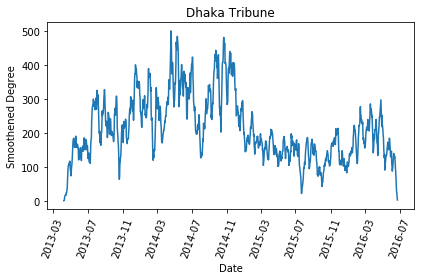

In [102]:
plt.xticks(rotation=70)
plt.title("Dhaka Tribune")
plt.xlabel("Date")
plt.ylabel("Smoothened Degree")
plt.plot(days, edgeOccurencesEachDay)

plt.tight_layout()
plt.savefig('Figures/DT-10daysmoothened-Degree.pdf')

## DS

In [126]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')
df['timestamp'] = df['timestamp'].progress_apply(fix_date)
df['timestamp'] = df['timestamp'].dt.date

100%|██████████| 914208/914208 [01:40<00:00, 9128.03it/s]


In [127]:
df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]

In [128]:
df.sort_values(by='timestamp', inplace=True)

In [136]:
df[df['timestamp']>parser.parse('2017-01-01').date()].shape

(731, 10)

In [129]:
subject_objects = []
subject_objects_with_timestamps = []
days = []
edgeOccurencesEachDay = {}

for _, row in df.iterrows():
    date = row['timestamp']
    subject_objects.append(tuple((row['entity0'],row['entity1'])))
    
    for i in range(1,expiry_date+1):
        subject_objects_with_timestamps.append(tuple((row['entity0'],row['entity1'],date)))
        
        if date in edgeOccurencesEachDay:
            edgeOccurencesEachDay[date] += 1
        else:
            edgeOccurencesEachDay[date] = 1
            days.append(date)
            previousDay = date
        date = date + datetime.timedelta(days=1)
        

edgeOccurencesEachDay = (collections.OrderedDict(sorted(edgeOccurencesEachDay.items())))
counter = collections.Counter(subject_objects)
numberOfTupleOccurences = sorted(counter.items())
edgeOccurencesEachDay = (list(edgeOccurencesEachDay.values()))

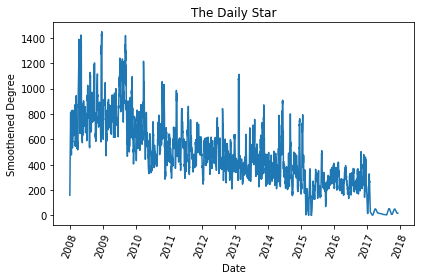

In [131]:
plt.xticks(rotation=70)
plt.title("The Daily Star")
plt.xlabel("Date")
plt.ylabel("Smoothened Degree")
plt.plot(days, edgeOccurencesEachDay)

plt.tight_layout()
plt.savefig('Figures/DS-10daysmoothened-Degree.pdf')

## NA

In [118]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.date

In [120]:
df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]

In [122]:
df.sort_values(by='timestamp', inplace=True)

In [123]:
subject_objects = []
subject_objects_with_timestamps = []
days = []
edgeOccurencesEachDay = {}

for _, row in df.iterrows():
    date = row['timestamp']
    subject_objects.append(tuple((row['entity0'],row['entity1'])))
    
    for i in range(1,expiry_date+1):
        subject_objects_with_timestamps.append(tuple((row['entity0'],row['entity1'],date)))
        
        if date in edgeOccurencesEachDay:
            edgeOccurencesEachDay[date] += 1
        else:
            edgeOccurencesEachDay[date] = 1
            days.append(date)
            previousDay = date
        date = date + datetime.timedelta(days=1)
        

edgeOccurencesEachDay = (collections.OrderedDict(sorted(edgeOccurencesEachDay.items())))
counter = collections.Counter(subject_objects)
numberOfTupleOccurences = sorted(counter.items())
edgeOccurencesEachDay = (list(edgeOccurencesEachDay.values()))

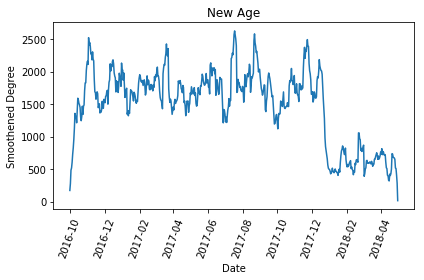

In [125]:
plt.xticks(rotation=70)
plt.title("New Age")
plt.xlabel("Date")
plt.ylabel("Smoothened Degree")
plt.plot(days, edgeOccurencesEachDay)

plt.tight_layout()
plt.savefig('Figures/NA-10daysmoothened-Degree.pdf')

# Difference between core rank every 6 months

## DT

In [81]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')

In [82]:
df['entity0'] = df['entity0'].apply(lambda x: "Sheikh Hasina" if x == "Sheikh Hasina," else x)
df['entity1'] = df['entity1'].apply(lambda x: "Sheikh Hasina" if x == "Sheikh Hasina," else x)

In [83]:
df['timestamp'] = df['timestamp'].apply(lambda x: x['$date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [84]:
i = df['timestamp'].min()
max_date_counter = 0
while i < df['timestamp'].max() + datetime.timedelta(weeks=24):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=24)

In [85]:
time = []
time.append(df['timestamp'].min())
for i in range(1,max_date_counter):
    time.append(time[i-1] + datetime.timedelta(weeks=24))

In [86]:
time

[Timestamp('2013-04-06 15:24:00'),
 Timestamp('2013-09-21 15:24:00'),
 Timestamp('2014-03-08 15:24:00'),
 Timestamp('2014-08-23 15:24:00'),
 Timestamp('2015-02-07 15:24:00'),
 Timestamp('2015-07-25 15:24:00'),
 Timestamp('2016-01-09 15:24:00'),
 Timestamp('2016-06-25 15:24:00')]

In [87]:
Graph_list = []

network_type = 'person'
for i in range(len(time)-1):
    G = nx.Graph()
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        if row['timestamp'] > time[i] and row['timestamp'] <= time[i+1]:
            if row['type0'] in network_type and row['type1'] in network_type:
                G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)


100%|██████████| 247369/247369 [00:15<00:00, 16401.44it/s]


In [88]:
len(Graph_list)

7

In [98]:
df_list = []

In [99]:
for i in range(len(Graph_list)):
    Graph_list[i].remove_edges_from(Graph_list[i].selfloop_edges())
    core = nx.core_number(Graph_list[i])
    core_periphery = pd.DataFrame.from_dict(core, orient='index')
    core_periphery = core_periphery.reset_index()
    core_periphery = core_periphery.sort_values(by='index')
    core_periphery.columns = ['name', 'core_periphery']
    df_list.append(core_periphery)

In [100]:
def bucket(core_periphery):
    if core_periphery > 4:
        return 5
    else:
        return core_periphery


for i in range(len(df_list)):
    df = df_list[i]
    df['core_periphery'] = df['core_periphery'].apply(bucket)
    df_list[i] = df

In [101]:
len(df_list)

7

In [102]:
cores = list(range(1,6))

with open("Data/Processed Data/Overlap Percentage/DT-core-comparison-6-months.csv", "w") as outfile:
            writer = csv.writer(outfile)
            writer.writerow(["core", "overlap"])


for j in cores:
    for i in range(len(df_list)-1):
        df1 = df_list[i]
        df2 = df_list[i+1]

        first = df1[df1['core_periphery'] == j]
        second = df2[df2['core_periphery'] == j]

        count = 0
        merged_df = first.merge(second)
        
        overlap = float("%.2f" %(merged_df.shape[0]/max(first.shape[0], second.shape[0]) * 100))
        
        with open("Data/Processed Data/Overlap Percentage/DT-core-comparison-6-months.csv", "a") as outfile:
            writer = csv.writer(outfile)
            writer.writerow([j, overlap])
    
    with open("Data/Processed Data/Overlap Percentage/DT-core-comparison-6-months.csv", "a") as outfile:
        writer = csv.writer(outfile)
        writer.writerow([])

## DS

In [147]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')

In [148]:
df['timestamp'] = df['timestamp'].progress_apply(fix_date)

100%|██████████| 914208/914208 [01:35<00:00, 9578.46it/s]


In [149]:
i = df['timestamp'].min()
max_date_counter = 0
while i < df['timestamp'].max() + datetime.timedelta(weeks=24):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=24)

print(max_date_counter)

23


In [150]:
time = []
time.append(df['timestamp'].min())
i = time[0]
for i in range(1,max_date_counter):
    time.append(time[i-1] + datetime.timedelta(weeks=24))

In [151]:
time

[Timestamp('2008-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2008-06-17 00:00:00+0000', tz='UTC'),
 Timestamp('2008-12-02 00:00:00+0000', tz='UTC'),
 Timestamp('2009-05-19 00:00:00+0000', tz='UTC'),
 Timestamp('2009-11-03 00:00:00+0000', tz='UTC'),
 Timestamp('2010-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2010-10-05 00:00:00+0000', tz='UTC'),
 Timestamp('2011-03-22 00:00:00+0000', tz='UTC'),
 Timestamp('2011-09-06 00:00:00+0000', tz='UTC'),
 Timestamp('2012-02-21 00:00:00+0000', tz='UTC'),
 Timestamp('2012-08-07 00:00:00+0000', tz='UTC'),
 Timestamp('2013-01-22 00:00:00+0000', tz='UTC'),
 Timestamp('2013-07-09 00:00:00+0000', tz='UTC'),
 Timestamp('2013-12-24 00:00:00+0000', tz='UTC'),
 Timestamp('2014-06-10 00:00:00+0000', tz='UTC'),
 Timestamp('2014-11-25 00:00:00+0000', tz='UTC'),
 Timestamp('2015-05-12 00:00:00+0000', tz='UTC'),
 Timestamp('2015-10-27 00:00:00+0000', tz='UTC'),
 Timestamp('2016-04-12 00:00:00+0000', tz='UTC'),
 Timestamp('2016-09-27 00:00:00+0000', tz='UTC'),


In [64]:
ds = df.set_index(df['timestamp'])
ds = ds.sort_index()

In [65]:
ds_list = []
for i in range(len(time)-1):
    temp = ds[time[i]:time[i+1]]
    ds_list.append(temp)

In [66]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(ds_list):
    G = nx.Graph()
    for _, row in df.iterrows():
        if row['type0'] in network_type and row['type1'] in network_type:
            count += 1
            G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

print(count)

100%|██████████| 22/22 [08:00<00:00, 21.82s/it]

171470


In [67]:
df_list = []

In [68]:
for i in range(len(Graph_list)):
    Graph_list[i].remove_edges_from(Graph_list[i].selfloop_edges())
    core = nx.core_number(Graph_list[i])
    core_periphery = pd.DataFrame.from_dict(core, orient='index')
    core_periphery = core_periphery.reset_index()
    core_periphery = core_periphery.sort_values(by='index')
    core_periphery.columns = ['name', 'core_periphery']
    df_list.append(core_periphery)

In [69]:
for i in range(len(df_list)):
    df = df_list[i]
    df['core_periphery'] = df['core_periphery'].apply(bucket)
    df_list[i] = df

In [70]:
len(df_list)

22

In [79]:
cores = list(range(1,6))

with open("Data/Processed Data/Overlap Percentage/DS-core-comparison-6-months.csv", "w") as outfile:
            writer = csv.writer(outfile)
            writer.writerow(["core", "overlap"])


for j in cores:
    for i in range(len(df_list)-1):
        df1 = df_list[i]
        df2 = df_list[i+1]

        first = df1[df1['core_periphery'] == j]
        second = df2[df2['core_periphery'] == j]

        count = 0
        merged_df = first.merge(second)
        
        overlap = float("%.2f" %(merged_df.shape[0]/max(first.shape[0], second.shape[0]) * 100))
        
        with open("Data/Processed Data/Overlap Percentage/DS-core-comparison-6-months.csv", "a") as outfile:
            writer = csv.writer(outfile)
            writer.writerow([j, overlap])
    
    with open("Data/Processed Data/Overlap Percentage/DS-core-comparison-6-months.csv", "a") as outfile:
        writer = csv.writer(outfile)
        writer.writerow([])

## NA

In [201]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')

In [202]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [203]:
i = df['timestamp'].min()
max_date_counter = 0
while i < df['timestamp'].max() + datetime.timedelta(weeks=24):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=24)

print(max_date_counter)

5


In [204]:
time = []
time.append(df['timestamp'].min())
i = time[0]
for i in range(1,max_date_counter):
    time.append(time[i-1] + datetime.timedelta(weeks=24))

In [205]:
time

[Timestamp('2016-10-01 00:00:00'),
 Timestamp('2017-03-18 00:00:00'),
 Timestamp('2017-09-02 00:00:00'),
 Timestamp('2018-02-17 00:00:00'),
 Timestamp('2018-08-04 00:00:00')]

In [206]:
na = df.set_index(df['timestamp'])
na = na.sort_index()

In [207]:
na_list = []
for i in range(len(time)-1):
    temp = na[time[i]:time[i+1]]
    na_list.append(temp)

In [208]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(na_list):
    G = nx.Graph()
    for _, row in df.iterrows():
        if row['type0'] in network_type and row['type1'] in network_type:
            G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

100%|██████████| 4/4 [00:47<00:00, 11.82s/it]


In [209]:
df_list = []

In [210]:
for i in range(len(Graph_list)):
    Graph_list[i].remove_edges_from(Graph_list[i].selfloop_edges())
    core = nx.core_number(Graph_list[i])
    core_periphery = pd.DataFrame.from_dict(core, orient='index')
    core_periphery = core_periphery.reset_index()
    core_periphery = core_periphery.sort_values(by='index')
    core_periphery.columns = ['name', 'core_periphery']
    df_list.append(core_periphery)

In [211]:
for i in range(len(df_list)):
    df = df_list[i]
    df['core_periphery'] = df['core_periphery'].apply(bucket)
    df_list[i] = df

NameError: name 'bucket' is not defined

In [ ]:
len(df_list)

In [146]:
cores = list(range(1,6))

with open("Data/Processed Data/Overlap Percentage/NA-core-comparison-6-months.csv", "w") as outfile:
            writer = csv.writer(outfile)
            writer.writerow(["core", "overlap"])


for j in cores:
    for i in range(len(df_list)-1):
        df1 = df_list[i]
        df2 = df_list[i+1]

        first = df1[df1['core_periphery'] == j]
        second = df2[df2['core_periphery'] == j]

        count = 0
        merged_df = first.merge(second)
        
        overlap = float("%.2f" %(merged_df.shape[0]/max(first.shape[0], second.shape[0]) * 100))
        
        with open("Data/Processed Data/Overlap Percentage/NA-core-comparison-6-months.csv", "a") as outfile:
            writer = csv.writer(outfile)
            writer.writerow([j, overlap])
    
    with open("Data/Processed Data/Overlap Percentage/NA-core-comparison-6-months.csv", "a") as outfile:
        writer = csv.writer(outfile)
        writer.writerow([])

# Evolution of core numbers at the top of the core month by month

## DT

In [267]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')

In [268]:
df['entity0'] = df['entity0'].apply(lambda x: "Sheikh Hasina" if x == "Sheikh Hasina," else x)
df['entity1'] = df['entity1'].apply(lambda x: "Sheikh Hasina" if x == "Sheikh Hasina," else x)

In [269]:
df['timestamp'] = df['timestamp'].apply(lambda x: x['$date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', inplace=True)

In [270]:
network_type = 'person'
G = nx.Graph()
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])

100%|██████████| 247369/247369 [00:14<00:00, 16818.09it/s]


In [271]:
G.remove_edges_from(nx.selfloop_edges(G))
core = nx.core_number(G)

In [272]:
maximum = max(core, key=core.get)
top_core = core[maximum]

top_cores = []

for name, core_number in core.items():
    if core_number == top_core:
        top_cores.append(name)

In [273]:
max_date_counter = 0
i = df['timestamp'].min()
while i < df['timestamp'].max() + datetime.timedelta(weeks=4):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=4)

In [274]:
time = []
time.append(df['timestamp'].min())


for i in range(1, max_date_counter):
    month = 4 # 1 month = 4 weeks
    # time.append(time[i-1] + datetime.timedelta(weeks=4)) # For noncumulative
    time.append(time[0] + datetime.timedelta(weeks=month * i)) # For cumulative

In [275]:
dt = df.set_index(df['timestamp'])
dt = dt.sort_index()

dt_list = []
for i in range(len(time)-1):
    # temp = dt[time[i]:time[i+1]] # For noncumulative
    temp = dt[time[0]:time[i+1]] # For cumulative
    dt_list.append(temp)

In [276]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(dt_list):
    df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
    G = nx.Graph()
    for _, row in df.iterrows():
        # if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

100%|██████████| 42/42 [00:38<00:00,  1.10it/s]


In [277]:
Graph_list.pop() # because the core periphery on the full network is already done

In [278]:
core_list = []
for G in Graph_list:
    G.remove_edges_from(nx.selfloop_edges(G))
    core_list.append(nx.core_number(G))

In [279]:
# max_core_over_time = ()
# for core in core_list:
#     maximum = max(core, key=core.get)
#     top_core = core[maximum]
#     max_core_over_time += (top_core,)

In [280]:
d = {}
for person in top_cores:
    for core in core_list:
        d.setdefault(person, []).append(core.get(person, 0))

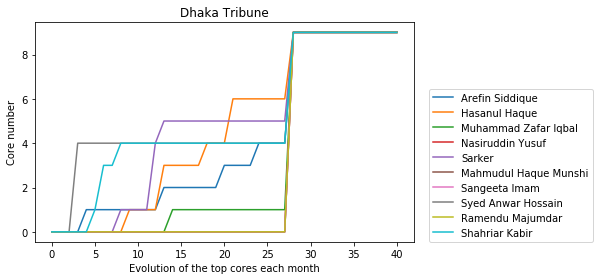

In [282]:
plt.title('Dhaka Tribune')
plt.ylabel('Core number')
plt.xlabel('Evolution of the top cores each month')

for k, v in d.items():
    if k == "Mahmudul Haque Munshi Gonojagoron Moncho":
        k = "Mahmudul Haque Munshi"
    plt.plot(v, label = k)
plt.legend(loc=(1.04,0))
plt.tight_layout()
plt.savefig('Figures/Evolution of Core/DT-evol-1-month.pdf')
# plt.show()

## DS

In [4]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')

In [5]:
df['timestamp'] = df['timestamp'].progress_apply(fix_date)
df.sort_values(by='timestamp', inplace=True)

100%|██████████| 914208/914208 [01:30<00:00, 10094.14it/s]


In [6]:
network_type = 'person'
G = nx.Graph()
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])

100%|██████████| 914208/914208 [08:27<00:00, 1799.70it/s]


In [7]:
G.remove_edges_from(nx.selfloop_edges(G))
core = nx.core_number(G)

In [8]:
maximum = max(core, key=core.get)
top_core = core[maximum]

top_cores = []

for name, core_number in core.items():
    if core_number == top_core:
        top_cores.append(name)

In [9]:
max_date_counter = 0
i = df['timestamp'].min()
while i < df['timestamp'].max() + datetime.timedelta(weeks=4):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=4)

In [10]:
max_date_counter

131

In [11]:
time = []
time.append(df['timestamp'].min())


for i in range(1, max_date_counter):
    month = 4 # 1 month = 4 weeks
    # time.append(time[i-1] + datetime.timedelta(weeks=4)) # For non-cumulative
    time.append(time[0] + datetime.timedelta(weeks=month * i)) # For cumulative

In [12]:
ds = df.set_index(df['timestamp'])
ds = ds.sort_index()

ds_list = []
for i in range(len(time)-1):
    # temp = ds[time[i]:time[i+1]] # For non-cumulative
    temp = ds[time[0]:time[i+1]] # For cumulative
    ds_list.append(temp)

In [13]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(ds_list):
    df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
    G = nx.Graph()
    for _, row in df.iterrows():
        # if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

100%|██████████| 130/130 [2:04:54<00:00, 57.65s/it]


In [14]:
Graph_list.pop() # because the core periphery on the full network is already done

In [15]:
core_list = []
for G in Graph_list:
    G.remove_edges_from(nx.selfloop_edges(G))
    core_list.append(nx.core_number(G))

In [16]:
d = {}
for person in top_cores:
    for core in core_list:
        d.setdefault(person, []).append(core.get(person, 0))

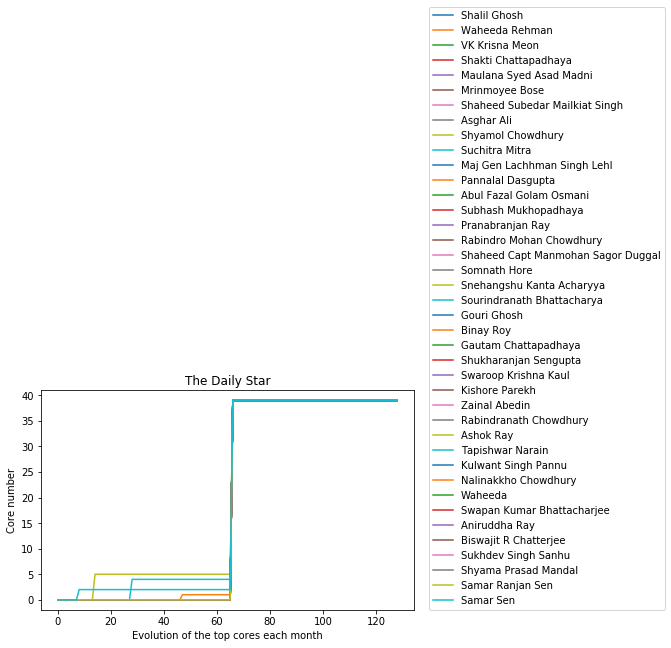

In [19]:
for k, v in d.items():
#     print(k, v)
#     break
    plt.plot(v, label = k)

plt.legend(loc=(1.04,0))
plt.title('The Daily Star')
plt.ylabel('Core number')
plt.xlabel('Evolution of the top cores each month')
plt.tight_layout()
plt.savefig('Figures/Evolution of Core/DS-evol-1-month.pdf')
# plt.show()

## NA

In [354]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')

In [355]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [356]:
df.sort_values(by='timestamp', inplace=True)

In [357]:
network_type = 'person'
G = nx.Graph()
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])

100%|██████████| 820506/820506 [00:47<00:00, 17122.38it/s]


In [358]:
G.remove_edges_from(nx.selfloop_edges(G))
core = nx.core_number(G)

In [359]:
maximum = max(core, key=core.get)
top_core = core[maximum]

top_cores = []

for name, core_number in core.items():
    if core_number == top_core:
        top_cores.append(name)

In [360]:
top_cores

['Khandker Raju Ahmed',
 'Azharul Islam',
 'Shamser Ali Prodhan',
 'Mustari Safi',
 'Mahjabin Begum',
 'Mesbah Uddin Ahmed',
 'Hajen Chandra Pahari',
 'Mohiuddin Ahmed',
 'Gitosree Chowdhury',
 'Manjusri Niyogi',
 'Mohammed Niaz Uddin',
 'M Mamun',
 'Dilip Kumar',
 'Sujit Roy',
 'Sarwar Jahan',
 'Sabuj Chakrabarty',
 'Anu Islam',
 'Kolyani Ghosh',
 'Hazrat Ali Bayati',
 'Abu Nowsher',
 'Milon Bhattacharjee',
 'Uma Khan',
 'Subrata Sengupta',
 'Jahirul Haque',
 'Chittaranjan Bhuiyan',
 'Abul Kalam Azad',
 'Rezwanul Haque',
 'Shafiur Rahman Dulu',
 'Niranjan Adhikari',
 'Sajeda Khatun',
 'Abu Bakar Siddique Prodhan',
 'Foyez Ahmad',
 'Abu Bakar Siddique',
 'Firoj Chowdhury',
 'Aminur Rahman',
 'Md Nazrul Islam']

In [361]:
max_date_counter = 0
i = df['timestamp'].min()
while i < df['timestamp'].max() + datetime.timedelta(weeks=4):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=4)

In [362]:
time = []
time.append(df['timestamp'].min())


for i in range(1, max_date_counter):
    month = 4 # 1 month = 4 weeks
    # time.append(time[i-1] + datetime.timedelta(weeks=4)) # For noncumulative
    time.append(time[0] + datetime.timedelta(weeks=month * i)) # For cumulative

In [363]:
na = df.set_index(df['timestamp'])
na = na.sort_index()

na_list = []
for i in range(len(time)-1):
    # temp = na[time[i]:time[i+1]] # For noncumulative
    temp = na[time[0]:time[i+1]] # For cumulative
    na_list.append(temp)

In [364]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(na_list):
    df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
    G = nx.Graph()
    for _, row in df.iterrows():
        # if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

100%|██████████| 21/21 [01:12<00:00,  3.46s/it]


In [365]:
Graph_list.pop() # because the core periphery on the full network is already done

In [366]:
core_list = []
for G in Graph_list:
    G.remove_edges_from(nx.selfloop_edges(G))
    core_list.append(nx.core_number(G))

In [367]:
d = {}
for person in top_cores:
    for core in core_list:
        d.setdefault(person, []).append(core.get(person, 0))

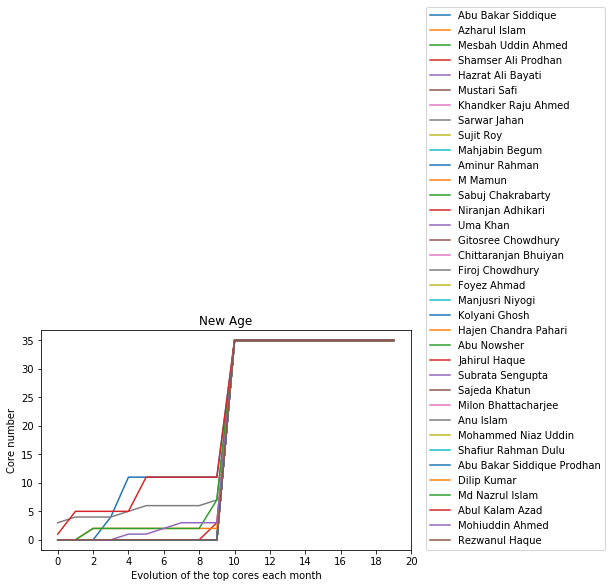

In [369]:
plt.title('New Age')
plt.ylabel('Core number')
plt.xlabel('Evolution of the top cores each month')

for k, v in d.items():
    plt.plot(v, label = k)
plt.legend(loc=(1.04,0))
plt.xticks(list(range(0, 21, 2)))
plt.tight_layout()
plt.savefig('Figures/Evolution of Core/NA-evol-1-month.jpg')
# plt.show()

# Counting number of edges per node

## DT

In [234]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')
df = df[((df['type0'] == 'person') | (df['type1'] == 'person'))]

In [235]:
first = df[['entity0', 'type0']]
first = first[first['type0'] == 'person']
first.columns = ['name', 'entity_type']

In [236]:
second = df[['entity1', 'type1']]
second = second[second['type1'] == 'person']
second.columns = ['name', 'entity_type']

In [237]:
both = pd.concat([first, second]).reset_index()

In [238]:
count = both.groupby('name').count().reset_index()
count.drop(['index'], axis=1, inplace=True)

In [239]:
count.drop(count.index[0:10], inplace=True)
count.drop(count.index[-11:], inplace=True)
count.sort_values(by='entity_type', ascending=False, inplace=True)

In [240]:
# df_fig = count[:100].plot.bar(x='name', width=1.0, legend=False) # With x label
# fig = df_fig.get_figure()
# fig.savefig("Figures/NodesVSEdges/DT.pdf")

In [241]:
# df_fig = count[:100].plot.bar(width=1.0, legend=False) # Without x label
# ax1 = plt.axes()
# x_axis = ax1.axes.get_xaxis()
# x_axis.set_visible(False)
# fig = df_fig.get_figure()
# fig.savefig("Figures/NodesVSEdges/DT.pdf")

In [242]:
y = count['entity_type'].tolist()
y = sorted(y, reverse=True)
y = tuple(y)
x = count['name'].tolist()

[[]]

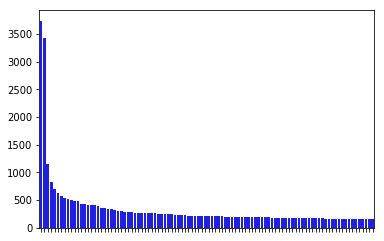

In [250]:
# plt.bar(x[:100], height=y[:100], width=1.0)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # 
# plt.xlabel("test")

g = sns.barplot(x = x[:100], y = y[:100], color="blue")
g.set(xticklabels=[])

# DS

In [76]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')
df = df[((df['type0'] == 'person') | (df['type1'] == 'person'))]

In [77]:
first = df[['entity0', 'type0']]
first = first[first['type0'] == 'person']
first.columns = ['name', 'entity_type']

In [78]:
second = df[['entity1', 'type1']]
second = second[second['type1'] == 'person']
second.columns = ['name', 'entity_type']

In [79]:
both = pd.concat([first, second]).reset_index()

In [80]:
count = both.groupby('name').count().reset_index()
count.drop(['index'], axis=1, inplace=True)

In [92]:
count.drop(count.index[0:96], inplace=True)
count.drop(count.index[-58:], inplace=True)
count.sort_values(by='entity_type', ascending=False, inplace=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


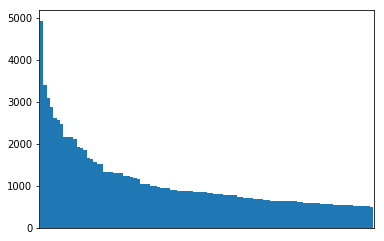

In [95]:
df_fig = count[:100].plot.bar(width=1.0, legend=False) # Without x label
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
fig = df_fig.get_figure()
fig.savefig("Figures/NodesVSEdges/DS.pdf")

## NA

In [133]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')
df = df[((df['type0'] == 'person') | (df['type1'] == 'person'))]

In [134]:
first = df[['entity0', 'type0']]
first = first[first['type0'] == 'person']
first.columns = ['name', 'entity_type']

In [135]:
second = df[['entity1', 'type1']]
second = second[second['type1'] == 'person']
second.columns = ['name', 'entity_type']

In [136]:
both = pd.concat([first, second]).reset_index()

In [137]:
count = both.groupby('name').count().reset_index()
count.drop(['index'], axis=1, inplace=True)

In [139]:
count.drop(count.index[0:85], inplace=True)
count.drop(count.index[-203:], inplace=True)
count.sort_values(by='entity_type', ascending=False, inplace=True)

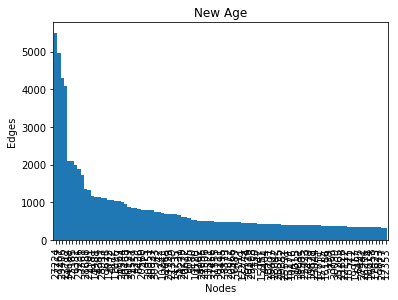

In [156]:
df_fig = count[:100].plot.bar(width=1.0, legend=False, xticks=None) # Without x label
df_fig.set_title("New Age")
df_fig.set_xlabel("Nodes")
df_fig.set_ylabel("Edges")
# ax1 = plt.axes()
# x_axis = ax1.axes.get_xaxis()
# x_axis.set_visible(False)
fig = df_fig.get_figure()
fig.savefig("Figures/NodesVSEdges/NA.jpg")